# Predict Ames House Price - Advanced Regression Techniques

In [1]:
__author__ = "Chris Tran"
__email__ = "tranduckhanh96@gmail.com"
__website__ = "chriskhanhtran.github.io"

# Part 1: Exploratory Data Analysis
**Read more: [Part 2: Data Preprocessing and Modeling](https://chriskhanhtran.github.io/projects/ames-house-price-part2.html)**
![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)
## Table of Contents

- [**1. Introduction**](#1-introduction)

- [**2. Exploratory Data Analysis**](#2-eda)

    - 2.1. [Sale Price](#2.1-saleprice)
   
    - 2.2. [Numerical Features](#2.2-numerical)
   
    - 2.3. [Categorical Features](#2.3-categorical)
   
    - 2.4. [Correlations](#2.4-correlations)
   
    - 2.5. [Missing Values](#2.5-missing)

## 1. Introduction <a name="1-introduction"></a>

After my first two data science projects where I solved classification problems using Random Forest and Support Vector Machine models, I am looking to expand my skill set by doing a comprehensive regression project. While taking Data Science micro-courses on Kaggle, I came across the [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges me to predict the final price of each home.

The [Ames Housing dataset](http://www.amstat.org/publications/jse/v19n3/decock.pdf) was compiled by Dean De Cock for use in data science education. The data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

In Part 1 of this project, I will perform comprehensive exploratory data analysis to understand linear relationships among the most important variables and detect potential issues such as sknewness, outliers and missing values. In Part 2, I will handle these issues, cleanse the data, perform feature engineering. Lastly, I will build machine learning models to predict house prices. By the time I write this notebook, my best model has **Mean Absolute Error** of **12383.11473**, ranking 98/14779, approximately top 0.6% in the Kaggle leaderboard.

**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')

**Load data**

In [3]:
# Load data
train_data = pd.read_csv('Data/train.csv', index_col='Id')
test_data = pd.read_csv('Data/test.csv', index_col='Id')

# Seperate features and target variable
X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data.SalePrice

# Concatenate train and test data
X = pd.concat([X_train, test_data], axis=0)

**Describe data**

In [4]:
print("Train data's size: ", X_train.shape)
print("Test data's size: ", test_data.shape)

Train data's size:  (1460, 79)
Test data's size:  (1459, 79)


In [5]:
numCols = list(X_train.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 36 numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [6]:
catCols = list(X_train.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} numerical features:\n", catCols)

There are 43 numerical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Data dictionary** can be found [here](https://github.com/chriskhanhtran/kaggle-house-price/blob/master/Data/data_description.txt).

## 2. Exploratory Data Analysis <a name="2-eda"></a>

### 2.1. Sale Price <a name="2.1-saleprice"></a>

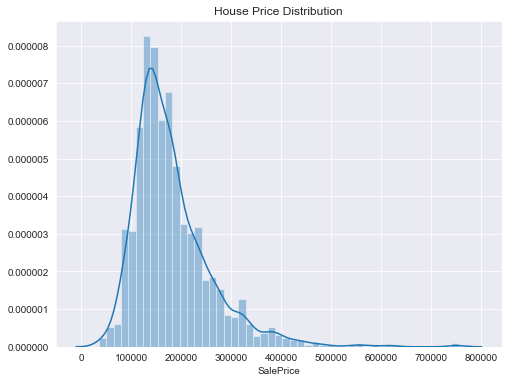

In [7]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")

The distribution of `SalePrice` is right-skewed. Let's check its Skewness and Kurtosis statistics.

In [8]:
print(f"""Skewness: {y.skew()}
Kurtosis: {y.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### 2.2. Numerical features <a name="2.2-numerical"></a>
Top 10 numerical variables highly correlated with `SalePrice`:

In [9]:
corr_mat = train_data.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

What are the top 10 features selected by [**Recursive Feature Elimination**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)?

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(X_train.fillna(0).select_dtypes(exclude='object'), y)
selectedFeatures = list(X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

According to above analyses, **Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built** are some of the most important features in determining house price. Let's take a closer look at them.

**Overall Quality**

Overall quality is the most important feature in both analyses. It is clear that higher quality makes the house more expensive.

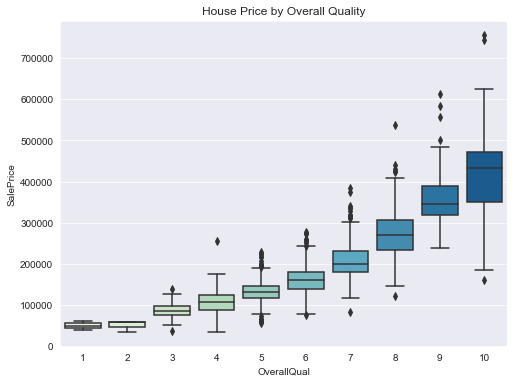

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Overall Quality')

**Living Area**

Living area has a linear relationship with house price. In the scatter plot below, we can clearly see some ***outliers*** in the data, especially the two houses in the lower-right corner with living area greater than ***4000 sqft*** and price lower than ***$200,000***.

Correlation:  0.7086244776126511


<Figure size 432x432 with 0 Axes>

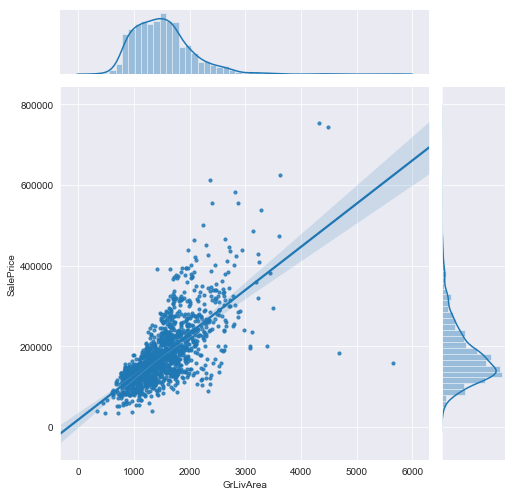

In [12]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", train_data[[
          variables[0], variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(train_data[(variables[0])], train_data[(variables[1])], kind='reg',
                  height=7, scatter_kws={'s': 10}, marginal_kws={'kde': True})

plotCorrelation(['GrLivArea', 'SalePrice'])

**GarageCars**

Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garage.

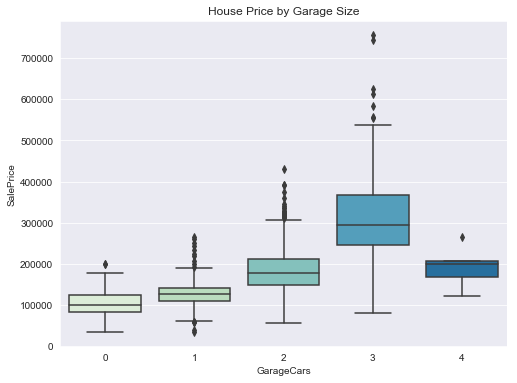

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Garage Size')

**Year Built**

The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

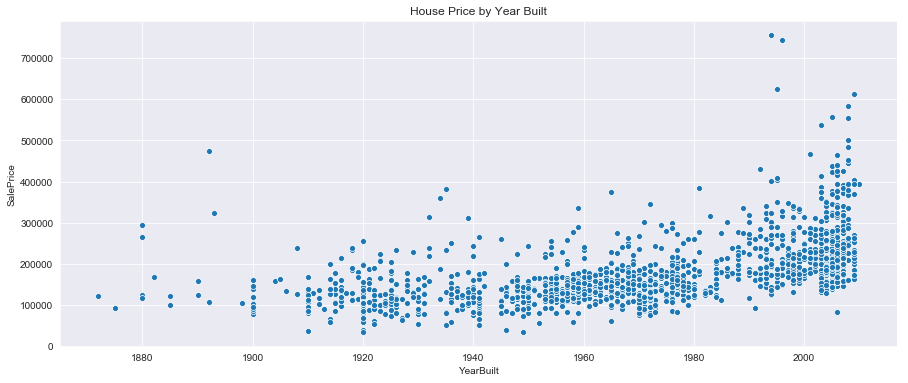

In [14]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

### 2.3. Categorical variables <a name="2.2-categorical"></a>

Using **ANOVA**, I have identified 15 categorical features having p-values lower than ***0.01***:

In [15]:
sigCatCols = ['Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
              'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
              'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC']

Let's explore some of them.

In [16]:
def visualizeCatFeature(feature):
    """
    Visualize the relationship between `SalePrice` and categorical feature using box plots
    """
    # Descending order of levels sorted by median SalePrice
    featOrder = train_data.groupby([feature]).median().SalePrice.sort_values(ascending=False).index
    
    # Create box plot
    sns.boxplot(x=feature, y='SalePrice', data=train_data, order=featOrder, palette='GnBu_r')

**Neighborhood**

There is a big difference in house prices among neighborhood in Ames. The top 3 expensive neighborhoods are **NridgHt, NoRidge and StoneBr** with median house prices of approximately $300,000, three times as high as the median of the 3 cheapest neighborhoods, which are **BrDale, DOTRR and MeadowV**.

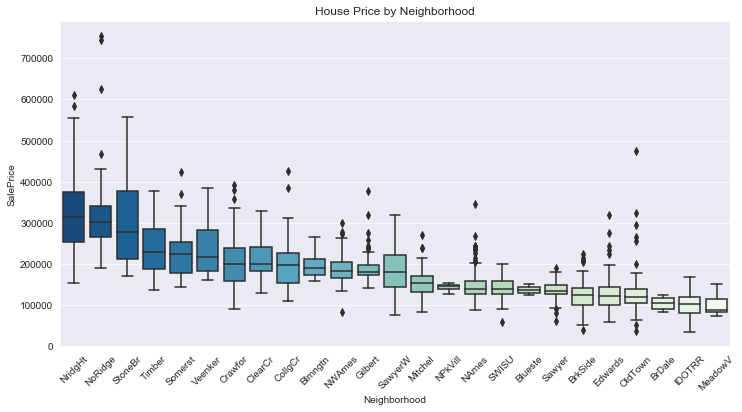

In [17]:
plt.figure(figsize=(12,6))
visualizeCatFeature('Neighborhood')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

**Roof Material**

Houses using **Wood Shingles roof** are the most expensive with price ranging from \\$300,000 to \\$450,000. There are also a lot of expensive houses using **Standard Composite Shingle roof**.

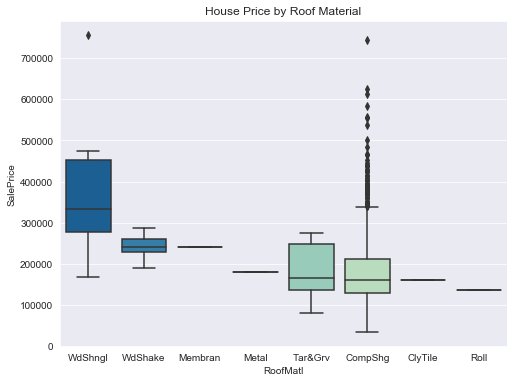

In [18]:
plt.figure(figsize=(8,6))
visualizeCatFeature('RoofMatl')
title = plt.title('House Price by Roof Material')

**Kitchen Quality**

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality. For example, the average price difference between a house with a **good** kitchen and one with an **excellent** kitchen is about $120,000.

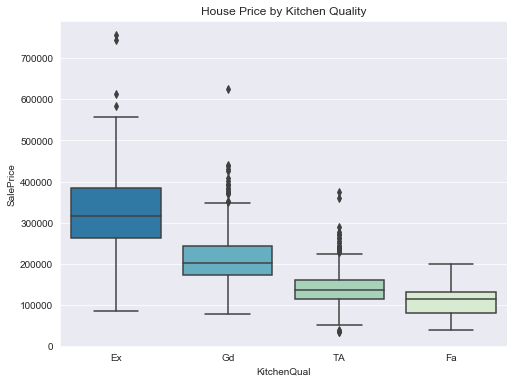

In [19]:
plt.figure(figsize=(8,6))
visualizeCatFeature('KitchenQual')
title = plt.title('House Price by Kitchen Quality')

## 2.4. Correlations <a name="2.4-correlations"></a>

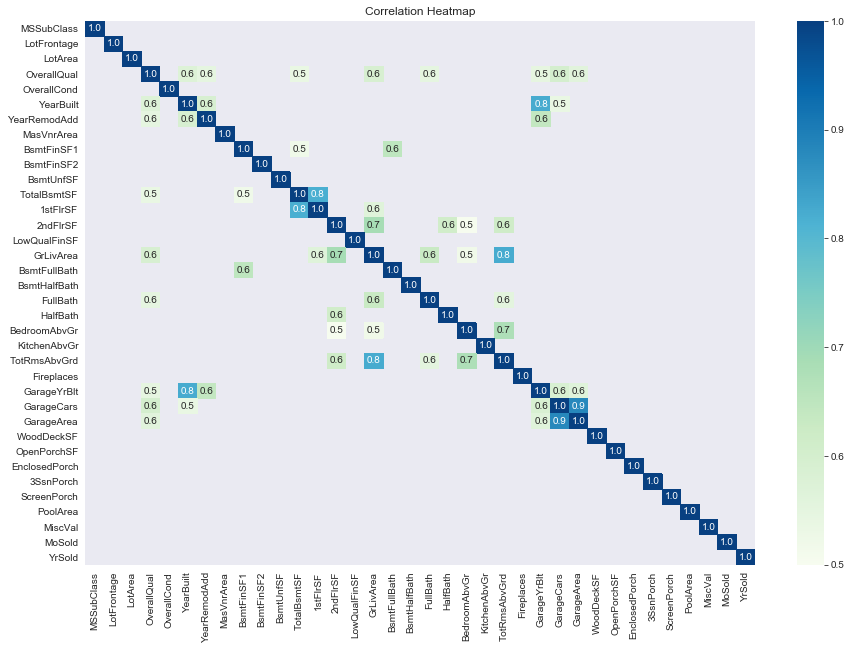

In [20]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_data.iloc[:,:-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat, annot=True, fmt='.1f',
            cmap='GnBu', vmin=0.5, vmax=1)
title = plt.title('Correlation Heatmap')

There is multicollinearity in our training data. Below features are highly correlated:
    - GarageCars and GarageArea
    - GarageYrBlt and YearBuilt
    - 1stFlrSF and TotalBsmtSF
    - GrLivArea and TotRmsAbvGrd
Multicolliniearity has a negative impact on our prediction models and makes standard errors of our estimates increase. Therefore, for each pair of highly correlated features, I will remove a feature that has a lower correlation with `SalePrice`.

## 2.5. Missing Values <a name="2.5-missing"></a>

Most machine learning algorithms give an error when we train them on data with missing values. Therefore, it's important to identify them before deciding how to handle them (drop features or impute missing value).

In [21]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum()/len(X)*100

missing_data = pd.DataFrame({'Count': missing_data_count,
                             'Percent': missing_data_percent})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 34 features having missing data.

Top 10 missing value features:


,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageYrBlt,159,5.447071


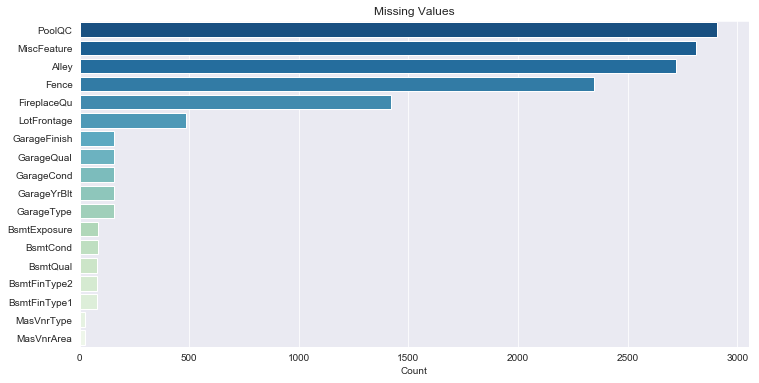

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(18).index, x=missing_data.head(18).Count, palette='GnBu_r')
title = plt.title("Missing Values")

With some basic understandings of the data set and features, let's move to data preprocessing and modeling steps.

**Read more: [Part 2: Data Preprocessing and Modeling](https://chriskhanhtran.github.io/projects/ames-house-price-part2.html)**